##**Métodos computacionales: Tarea 2.**

Por: Juan Esteban Ospina Holguín y Mariana Toro Escobar.

In [1]:
"""Librerías"""
import numpy as np
import matplotlib.pyplot as plt

#1. Campo Electrico

Se diseña un código para mostrar las lineas de campo de dos cargas electricas.

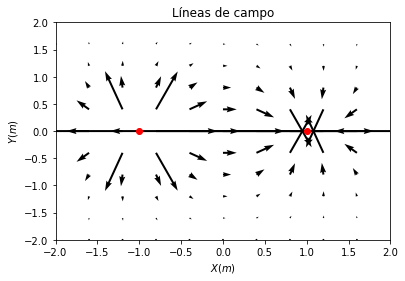

In [2]:
"""Este código grafica las lineas de campo electrico de dos cargas electricas"""
#limites
xlim=2
ylim=2
paso = .4
k = 1
q1=1
q2=-1
r_source = {"q1": np.array([-1, 0]),
            "q2": np.array([1,0])} #posición de la fuente
def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  global k
  return k*q/r**2

def Campo_fuente1(rsource, rp) : 
  """
  componentes de campo electrico
  """
  r_source = {"q1": rsource} #posiciones
  Delta_R =  rp- r_source["q1"] 
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  u_R = Delta_R/MagDelta_R
  E = E_campo(q1,MagDelta_R ) * u_R
  Ex=E[0]; Ey=E[1]
  return Ex, Ey

def Campo_fuente2(rsource, rp) : 
  """
  componentes de campo electrico
  """
  r_source = {"q1": rsource} #posiciones
  Delta_R =  rp- r_source["q1"] 
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  u_R = Delta_R/MagDelta_R
  E = E_campo(q2,MagDelta_R ) * u_R
  Ex=E[0]; Ey=E[1]
  return Ex, Ey
#creamos un espacio para evaluar
x  = np.arange(-xlim, xlim, paso)
n1 = len(x)
y  = np.arange(-ylim, ylim, paso)
n2 = len(y)
rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1  

#calculamos el valor de las componentes de los vectores del campo eléctrico para dos cargas

E1 = np.zeros((n1*n2, 2))
E2 = np.zeros((n1*n2, 2))
for i in range(0, len(rp)):
  E1[i] = Campo_fuente1(r_source["q1"], rp[i] )
  E2[i] = Campo_fuente2(r_source["q2"], rp[i] )

#Se grafican las posiciones de las cargas
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro" ) 
plt.plot(r_source["q2"][0], r_source["q2"][1], "ro" ) 
plt.title("Líneas de campo")
plt.xlabel('$X(m)$')
plt.ylabel('$Y(m)$')
plt.xlim(-xlim,xlim)
plt.ylim(-ylim, ylim)
#se grafican las líneas de campo
plt.quiver(rp[:,0], rp[:,1], E1[:,0]+E2[:,0], E1[:,1]+E2[:,1]);


#2. Tiro Parabolico

¡Hay cesta!


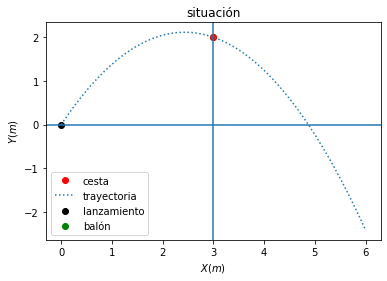

In [3]:
"""Este código determina si al lanzar un balón hay cesta o no"""
#Parametros iniciales
angulo=60 #angulo en grados
vo=10.5 #m/s velocidad inicial
xc=3 #distancia horizontal del lanzador a la cesta
yc=2 #m altura de la cesta
g=9.8 # constante de Cavendish
error=0.01 #Margen para que haya cesta

def rad(a):return a*np.pi/180 #grados a radianes
def Y(x): y=np.tan(b)*x-(0.5*g*x**2)/(vox**2*np.cos(b)); return y #posición en y en función de X
b= rad(angulo)
#Velocidades iniciales en x y y en metros por segundo
vox = vo*np.cos(b)
voy = vo*np.sin(b)
#se grafica la situación
plt.plot(xc,yc,"ro",label="cesta")
plt.scatter(0,0,label="lanzamiento",color='black')
plt.axhline(0,0,xc)
plt.axvline(xc,0,yc)
plt.title("situación")

#se grafica la situación
x = np.linspace(0,6,50)
plt.plot(x,Y(x),':',label='trayectoria')
plt.scatter(xc,Y(xc),color='green',label='balón')
plt.xlabel('$X(m)$')
plt.ylabel('$Y(m)$')
plt.legend();

#se evalua si hay cesta o no
if Y(xc-0.5)>yc:#el balón debe entrar por encima de la cesta
  if abs(Y(xc)-yc)<error:
    print('¡Hay cesta!')
  else: print('No hay cesta')
else: print('No hay cesta')